In [3]:
import numpy as np
import csv
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from kmeans import kmeans
from read_dataset import read_dataset
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from random import randrange

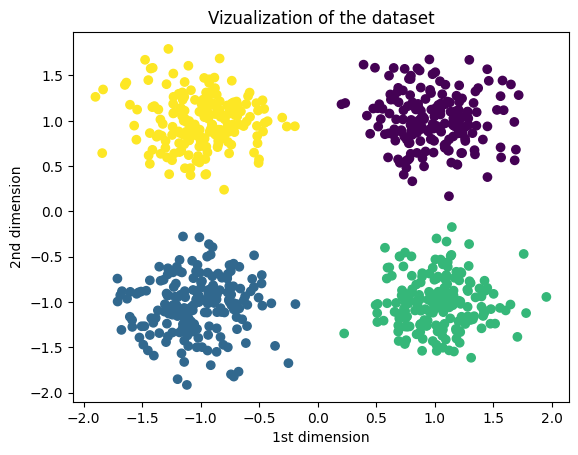

In [5]:
##############################################
## PART A: Artificial data
##############################################
#%%
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
data_art, labels_art = make_blobs(n_samples=750, centers=centers, cluster_std=0.3,
                            random_state=0)

# Visualize dataset
fig1 = plt.figure(1)
ax1 = fig1.add_subplot()
ax1.scatter(data_art[:,0],data_art[:,1], c=labels_art)
ax1.set_xlabel('1st dimension')
ax1.set_ylabel('2nd dimension')
ax1.set_title("Vizualization of the dataset")
plt.show()

In [35]:
def simpleInitialization(X,k):
    # Initialize k centroids randomly
    centroidIndices = []
    for i in range(k):
        r = randrange(X.shape[0])
        while r in centroidIndices:
            r = randrange(X.shape[0])
        centroidIndices.append(r)
        
    centroids = np.zeros((k,X.shape[1]))
    for i in range(k):
        centroids[i, :] = X[centroidIndices[i], :]
        
    return centroids

In [8]:
data_art.shape

(750, 2)

In [14]:
simpleInitialization(data_art,3)

540
[540]
392
[540, 392]
555
[540, 392, 555]


array([[-0.99689521, -0.78398987],
       [ 1.0179684 , -1.06375691],
       [ 1.13445859, -0.49114553]])

In [15]:
data_art[540]

array([-0.99689521, -0.78398987])

In [29]:
a=[2,3,1]

In [31]:
a.index(min(a))

2

In [161]:
def kmeans(X, k):
    # Intialize centroids
    centroids = simpleInitialization(X, k)
    labels = np.zeros(X.shape[0])
     # ====================== ADD YOUR CODE HERE ======================
    # Instructions: Run the main k-means algorithm. Follow the steps 
    #               given in the description. Compute the distance 
    #               between each instance and each centroid. Assign 
    #               the instance to the cluster described by the closest
    #               centroid. Repeat the above steps until the centroids
    #               stop moving or reached a certain number of iterations
    #               (e.g., 100).
    
    
    for counter in range(100):
        for i in range(X.shape[0]):
            dist=[]
            for c in centroids:
                dist.append(np.linalg.norm(X[i]-c))
            labels[i]=dist.index(min(dist))+1
        
        new_centroid=np.zeros((k,X.shape[1]))
        
        for i in range(1,k+1):
            index=np.where(labels==i)
            new_centroid[i-1]=X[index].mean(axis=0)
        if np.linalg.norm(new_centroid - centroids) < 0.001:
            break

        centroids = new_centroid.copy()
                
            
        
        
    




    
    # ===============================================================
    return labels

In [162]:
k = 4
labels_pred_art = kmeans(data_art, k)

In [163]:
labels_pred_art

array([3., 4., 3., 2., 3., 1., 1., 2., 3., 3., 4., 1., 4., 2., 4., 3., 4.,
       1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 3., 3., 1., 3., 4., 4., 3.,
       4., 3., 2., 3., 3., 2., 1., 1., 4., 1., 4., 1., 4., 2., 3., 1., 2.,
       1., 1., 4., 2., 2., 1., 3., 1., 1., 1., 1., 1., 2., 2., 3., 2., 1.,
       3., 3., 4., 2., 3., 4., 2., 4., 3., 4., 3., 2., 4., 4., 4., 3., 3.,
       3., 4., 1., 4., 2., 1., 3., 1., 3., 1., 3., 1., 1., 3., 4., 2., 1.,
       2., 3., 2., 1., 2., 2., 3., 4., 4., 1., 4., 4., 4., 3., 4., 4., 3.,
       1., 2., 1., 3., 4., 1., 2., 1., 3., 3., 2., 3., 2., 2., 2., 4., 4.,
       1., 2., 3., 1., 4., 1., 4., 3., 2., 2., 2., 1., 1., 3., 2., 1., 1.,
       2., 2., 2., 3., 1., 3., 1., 3., 4., 3., 2., 2., 4., 4., 1., 1., 4.,
       3., 4., 2., 1., 1., 4., 4., 1., 2., 3., 1., 2., 3., 3., 2., 4., 4.,
       4., 3., 1., 3., 4., 4., 1., 2., 3., 4., 1., 4., 1., 1., 2., 2., 1.,
       1., 3., 2., 3., 2., 2., 3., 2., 2., 1., 4., 4., 1., 4., 1., 2., 2.,
       2., 2., 1., 1., 2.

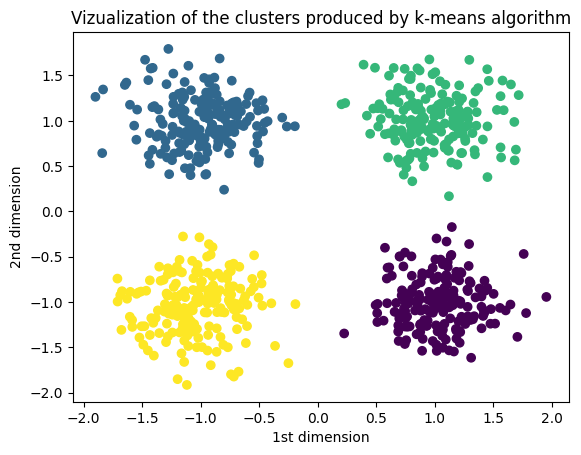

In [164]:
# Plot clustering results
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
ax2.scatter(data_art[:,0],data_art[:,1], c=labels_pred_art)
ax2.set_xlabel('1st dimension')
ax2.set_ylabel('2nd dimension')
ax2.set_title("Vizualization of the clusters produced by k-means algorithm")
plt.show()


In [7]:
##############################################
## PART B: MNIST dataset
##############################################
#%%

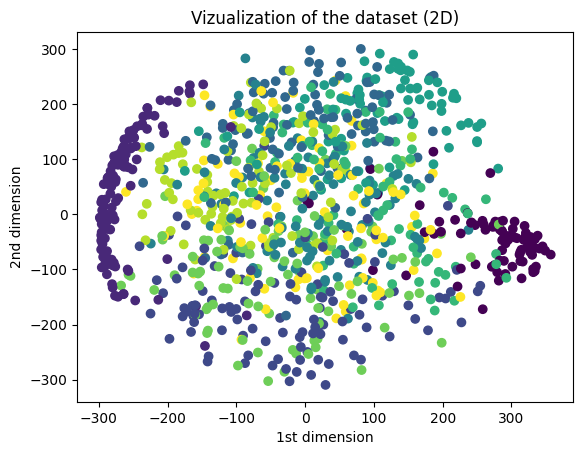

In [167]:
# Number of instaces and number of principal components (features)
n_instances = 1000
pca_features = 8

_, labels_mnist = read_dataset(n_instances, pca_features);


# Create the dataset (data_mnist) that will be used in clustering
# load the PCA features of the test data set
data_mnist = np.array(list(csv.reader(open("test_data.csv")))).astype('float')
data_mnist = data_mnist[:n_instances,:pca_features] #only 8 first features are kept 

# Plot 2 out of 8 dimensions of the dataset - colors correspond to true labels
# (Hint: experiment with different combinations of dimensions)
# Only for illustration purposes
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(111)
ax3.scatter(data_mnist[:,0],data_mnist[:,1], c=labels_mnist)
ax3.set_xlabel('1st dimension')
ax3.set_ylabel('2nd dimension')
ax3.set_title("Vizualization of the dataset (2D)")
plt.show()

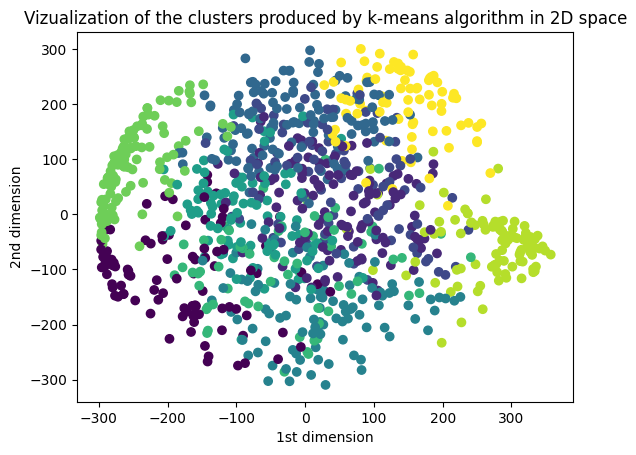

In [168]:
# Run k-means algorithm for different values of k
k = 10
labels_pred_mnist = kmeans(data_mnist,k)

# Plot clustering results
fig4 = plt.figure(4)
ax4 = fig4.add_subplot(111)
ax4.scatter(data_mnist[:,0],data_mnist[:,1], c=labels_pred_mnist)
ax4.set_xlabel('1st dimension')
ax4.set_ylabel('2nd dimension')
ax4.set_title("Vizualization of the clusters produced by k-means algorithm in 2D space")
plt.show()